# Técnica de sobremuestreo



1. Importacion de librerias:

In [1]:
import pandas as pd
#import matplotlib as plt
#from collab
import matplotlib.pyplot as plt
import seaborn as sns

2. Lectura de nuestro conjunto de datos. Obtenidos de los relsultados de estudios de Cancer de prostata

In [2]:
df = pd.read_csv('Prostate_Cancer.csv')

3. Previsualizacion de nuestro conjunto de datos

In [3]:
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


4. Conteo de filas y columnas de nuestro conjunto de datos

In [4]:
df.shape

(100, 10)

5. Conteo de clases "diagnosis_result"

In [5]:
df.diagnosis_result.value_counts()

,count
diagnosis_result,
M,62
B,38


6. Proporcion de nuestras clases en porcentaje

In [6]:
df.diagnosis_result.value_counts()/df.shape[0]

,count
diagnosis_result,
M,0.62
B,0.38


7. Vizualicacion gráfica de el conteo de nuestras clases

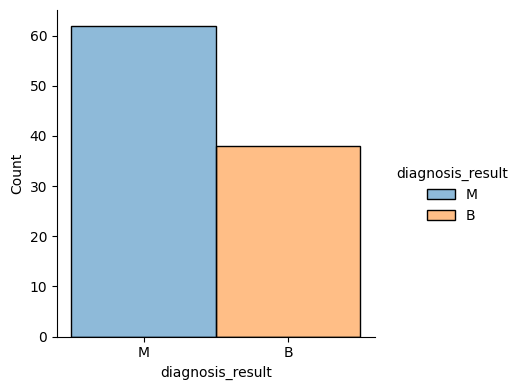

In [7]:
sns.displot(data=df, x="diagnosis_result", hue="diagnosis_result", height=4)

## Entrenamiento de nuestro modelo

1. Importación de nuestras librerias

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

2. Separacion predictora y predicha de nuestro dataset

In [9]:
#Variables independientes
xp = df.drop('diagnosis_result', axis=1)
#Variables dependientes
yp = df['diagnosis_result']

3. Partición de datos: Creación de muestras de entrenamiento y prueba

In [10]:
x_train, x_test, y_train, y_test = train_test_split(xp, yp, test_size=0.2)

4. Visualización de los tamaños de nuestros conjuntos de entrenamiento y prueba:  x, y

In [11]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((80, 9), (80,), (20, 9), (20,))

5. Creación de nuestro arbol de decisión de clasificación

In [12]:
tree_classification = DecisionTreeClassifier()
tree_model = tree_classification.fit(x_train, y_train)
y_predict = tree_model.predict(x_test)

6. Calculo de clasificación con los datos actuales

In [13]:
accuracy_score(y_test, y_predict)

0.8

In [14]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           B       0.86      0.67      0.75         9
           M       0.77      0.91      0.83        11

    accuracy                           0.80        20
   macro avg       0.81      0.79      0.79        20
weighted avg       0.81      0.80      0.80        20



7. Visualización de nuestra matriz de confusión

<ipython-input-15-f97ede4dc052>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['']+labels)
<ipython-input-15-f97ede4dc052>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['']+labels)


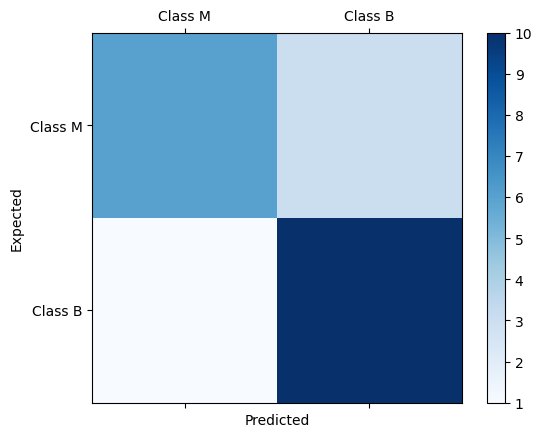

In [15]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predict)
labels = ['Class M', 'Class B']
figure = plt.figure()
ax = figure.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
figure.colorbar(cax)
ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## Sobremuestreo (Oversampling)

1. Conteo y guardado del numero de filas de  nuestras clases: M, B

In [16]:
count_class_M, count_class_B =df.diagnosis_result.value_counts()
print('Numero de filas por clase: ')
print('clase M: ', count_class_M)
print('clase B: ', count_class_B)

Numero de filas por clase: 
clase M:  62
clase B:  38


2. División y guardado de los datasets por clases: M, B

In [17]:
df_class_M = df[df['diagnosis_result'] == 'M']
df_class_B = df[df['diagnosis_result'] == 'B']


In [18]:
print('Dimensiónes por tipo de clase: ')
print('Dimensión clase M', df_class_M.shape)
print('Dimensión clase B', df_class_B.shape)

Dimensiónes por tipo de clase: 
Dimensión clase M (62, 10)
Dimensión clase B (38, 10)


3. Creación y guardado de  dataset con sobremuestreo de la clase: B

In [19]:
df_class_B_over = df_class_B.sample(count_class_M, replace=True)
df_over =pd.concat([df_class_M, df_class_B_over], axis=0)


In [20]:
print('Diferenia de dimensiónes por tipo de clase generadas: ')
print('Dimension clase B (antes: sobremuestreo): ', df_class_B.shape)
print('Dimension clase B (después: sobremuestreo): ', df_class_B_over.shape)

Diferenia de dimensiónes por tipo de clase generadas: 
Dimension clase B (antes: sobremuestreo):  (38, 10)
Dimension clase B (después: sobremuestreo):  (62, 10)


4. Previsualización del nuevo dataset, ya aplicado el sobremuestreo

In [21]:
df_over.head(10)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082
10,11,M,24,21,103,798,0.082,0.067,0.153,0.057
11,12,M,17,15,104,781,0.097,0.129,0.184,0.061


In [22]:
print('Número de clases ahora con sobremuestreo:')
print(df_over.diagnosis_result.value_counts())

Número de clases ahora con sobremuestreo:
diagnosis_result
M    62
B    62
Name: count, dtype: int64


5. Visualización gráfica de el conteo de las clases en el nuevo dataset

<Axes: xlabel='diagnosis_result'>

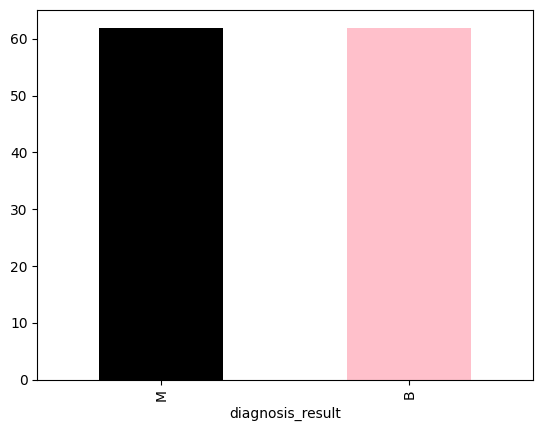

In [23]:
c = ['black', 'pink']
df_over.diagnosis_result.value_counts().plot(kind="bar", color=c)



6. Separación predictora y predicha de nuestro dataset

In [24]:
#Variables independientes
x_over = df_over.drop('diagnosis_result', axis=1)
#Variables dependientes
y_over = df_over['diagnosis_result']

7. Partición de datos: creación y guardado de muestras de entrenamiento

In [25]:
xover_train, xover_test, yover_train, yover_test = train_test_split(x_over, y_over, test_size=0.2)

8. Visualización de los tamaños de nuestros conjuntos de entrenamiento y prueba:  xover, yover

In [26]:
xover_train.shape, yover_train.shape, xover_test.shape, yover_test.shape

((99, 9), (99,), (25, 9), (25,))

9. Creación de nuestro arbol de decisión de clasificación

In [27]:
treeover_classification = DecisionTreeClassifier()
treeover_model = treeover_classification.fit(xover_train, yover_train)
yover_predict = treeover_model.predict(xover_test)

10. Calculo de clasificación con nuestros datos, después de la aplicación de sobremuetreo

In [28]:
accuracy_score(yover_test, yover_predict)

0.92

In [29]:
print(classification_report(yover_test, yover_predict))

              precision    recall  f1-score   support

           B       0.87      1.00      0.93        13
           M       1.00      0.83      0.91        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



11. Visualización gráfica de la matriz de confusión

<ipython-input-30-a51f57748346>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axover.set_xticklabels(['']+labels)
<ipython-input-30-a51f57748346>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axover.set_yticklabels(['']+labels)


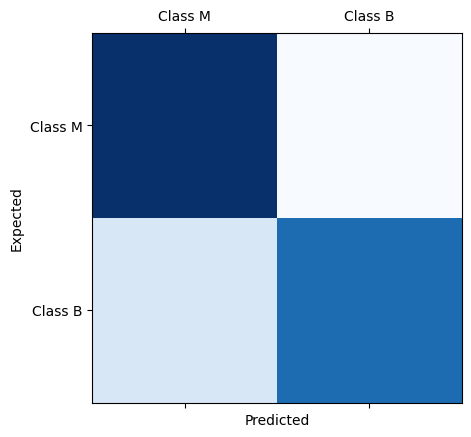

In [30]:
confover_mat = confusion_matrix(y_true=yover_test, y_pred=yover_predict)
labels = ['Class M', 'Class B']
figureover = plt.figure()
axover = figureover.add_subplot(111)
caxover = axover.matshow(confover_mat, cmap=plt.cm.Blues)
figureover.colorbar(cax)
axover.set_xticklabels(['']+labels)
axover.set_yticklabels(['']+labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## SMOTE

1. Importamos nuestra libreria, para hacer uso de SMOTE

In [31]:
from imblearn.over_sampling import SMOTE as sm

2. Separación predictoras y predichas

In [32]:
x = df.drop('diagnosis_result', axis=1)
y = df['diagnosis_result']

3. Aplicar estrategia sobre la clase minoritaria: B

In [33]:
smote = sm(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)


4. Separación de las x, y

In [34]:
df_x_sm = pd.DataFrame(data=x_sm, columns=x.columns)
df_y_sm = pd.DataFrame(data=y_sm, columns=['diagnosis_result'])

5. Union de los df para la obtención de un df balanceado

In [35]:
df_balanceado_sm = pd.concat([df_x_sm, df_y_sm], axis=1)

6. Conteo de clases de nuestro df balanceado

In [36]:
df_balanceado_sm.diagnosis_result.value_counts()

,count
diagnosis_result,
M,62
B,62


7. Visualización gráfica de las clases en nuestro df balanceado

<Axes: xlabel='diagnosis_result'>

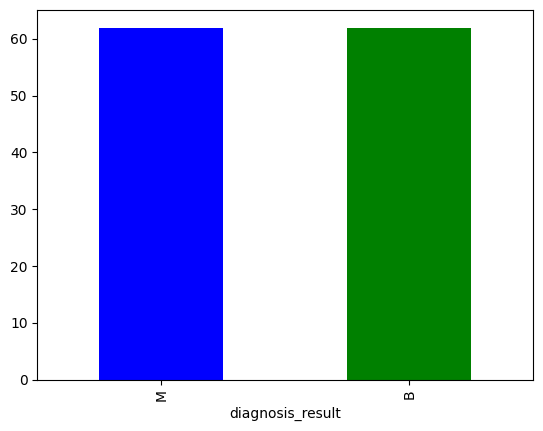

In [37]:
c = ['blue', 'green']
df_balanceado_sm.diagnosis_result.value_counts().plot(kind="bar", color=c)

8. Separación predictoras y predichas

In [38]:
x_balance = df_balanceado_sm.drop('diagnosis_result', axis=1)
y_balance = df_balanceado_sm['diagnosis_result']

9. Creación de muetras de entrenamiento y prueba

In [39]:
xbalance_train, xbalance_test, ybalance_train, ybalance_test = train_test_split(x_balance, y_balance, test_size=.2)

tree_balance = DecisionTreeClassifier()

tree_model_balance = tree_balance.fit(xbalance_train, ybalance_train)

10. y predicho

In [40]:
y_pred_balance = tree_model_balance.predict(xbalance_test)

11. Calculo de indicadores de clasificación

In [41]:
accuracy_score(ybalance_test, y_pred_balance)

0.84

In [42]:
print(classification_report(ybalance_test, y_pred_balance))

              precision    recall  f1-score   support

           B       0.88      0.70      0.78        10
           M       0.82      0.93      0.88        15

    accuracy                           0.84        25
   macro avg       0.85      0.82      0.83        25
weighted avg       0.84      0.84      0.84        25

